In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/donation_drive.csv')
df.head()

,city_id,days,temperature,prev_day_funds,n_volunteers,is_friday,success
0,1,1,39.786433,496.0,5,0.0,1
1,1,2,43.004376,677.0,19,0.0,0
2,1,3,28.482752,908.0,17,0.0,1
3,1,4,27.234014,815.0,5,0.0,0
4,1,5,31.963546,889.0,8,1.0,1


In [3]:
X = df[['temperature','prev_day_funds','n_volunteers','is_friday']]
y = df['success']

In [5]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = LogisticRegression()

In [6]:
accuracies = []
precisions = []
recalls = []

In [ ]:
for train_idx, test_idx in kfold.split(X, y):
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

In [8]:
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
mean_precision = np.mean(precisions)
std_precision = np.std(precisions)
mean_recall = np.mean(recalls)
std_recall = np.std(recalls)

In [9]:
print(f"Average Accuracy: {mean_accuracy:.2f} ± {std_accuracy:.2f}")
print(f"Average Precision: {mean_precision:.2f} ± {std_precision:.2f}")
print(f"Average Recall: {mean_recall:.2f} ± {std_recall:.2f}")

Average Accuracy: 0.75 ± 0.07
Average Precision: 0.69 ± 0.30
Average Recall: 0.29 ± 0.19


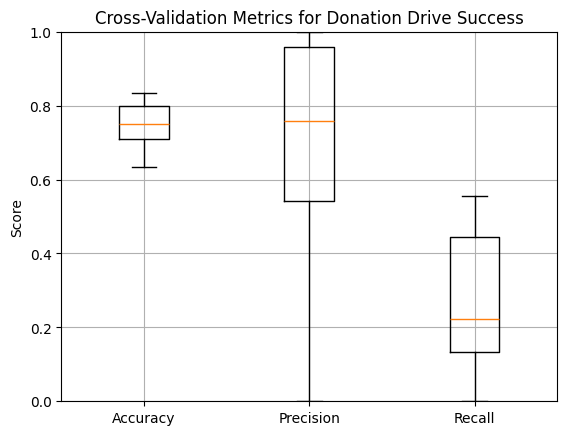

In [10]:
plt.boxplot([accuracies, precisions, recalls], labels=["Accuracy", "Precision", "Recall"])
plt.title("Cross-Validation Metrics for Donation Drive Success")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()